CSV data breakdown:

The Donations.csv file contains the following columns:

- TotalDailyDonation: The total number of donations made on a given day.
- DateofDonation: The date on which the donation(s) were made.
- DonationAmount: The amount of the donation before fees.
- Fees: The fees associated with the donation.
- DonationReceived: The net amount received after fees.


In [8]:
import pandas as pd
import numpy as py
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the DonationsCSV file
df = pd.read_csv('Donations.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,TotalDailyDonation,DateofDonation,DonationAmount,Fees,DonationReceived
0,0,2/26/2024,0.0,0.0,0.0
1,0,2/25/2024,0.0,0.0,0.0
2,0,2/24/2024,0.0,0.0,0.0
3,1,2/23/2024,5.6,-0.6,5.0
4,0,2/22/2024,0.0,0.0,0.0


Below is overall summary statistical analysis of the donations.csv data set as well as plotting options

In [7]:
# Compute overall summary statistics for the dataset
overall_summary = df.describe()

# Compute summary statistics for specific columns
donation_amount_summary = df['DonationAmount'].describe()
fees_summary = df['Fees'].describe()
donation_received_summary = df['DonationReceived'].describe()

# Print the summary statistics
print("Overall Summary Statistics:")
print(overall_summary)
print("\nDonation Amount Summary:")
print(donation_amount_summary)
print("\nFees Summary:")
print(fees_summary)
print("\nDonation Received Summary:")
print(donation_received_summary)

Overall Summary Statistics:
       TotalDailyDonation  DonationAmount       Fees  DonationReceived
count           26.000000       26.000000  26.000000         26.000000
mean             0.961538       22.701154  -0.922692         21.778462
std              3.026295       69.976070   2.756223         67.346463
min              0.000000        0.000000 -10.750000          0.000000
25%              0.000000        0.000000   0.000000          0.000000
50%              0.000000        0.000000   0.000000          0.000000
75%              0.000000        0.000000   0.000000          0.000000
max             13.000000      318.710000   0.000000        307.960000

Donation Amount Summary:
count     26.000000
mean      22.701154
std       69.976070
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      318.710000
Name: DonationAmount, dtype: float64

Fees Summary:
count    26.000000
mean     -0.922692
std       2.756223
min     -10.750000
25%       0.000000


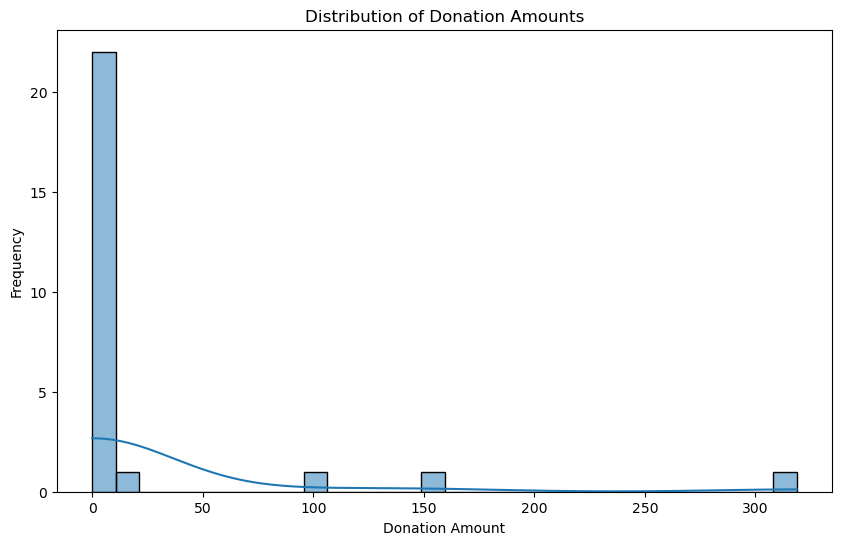

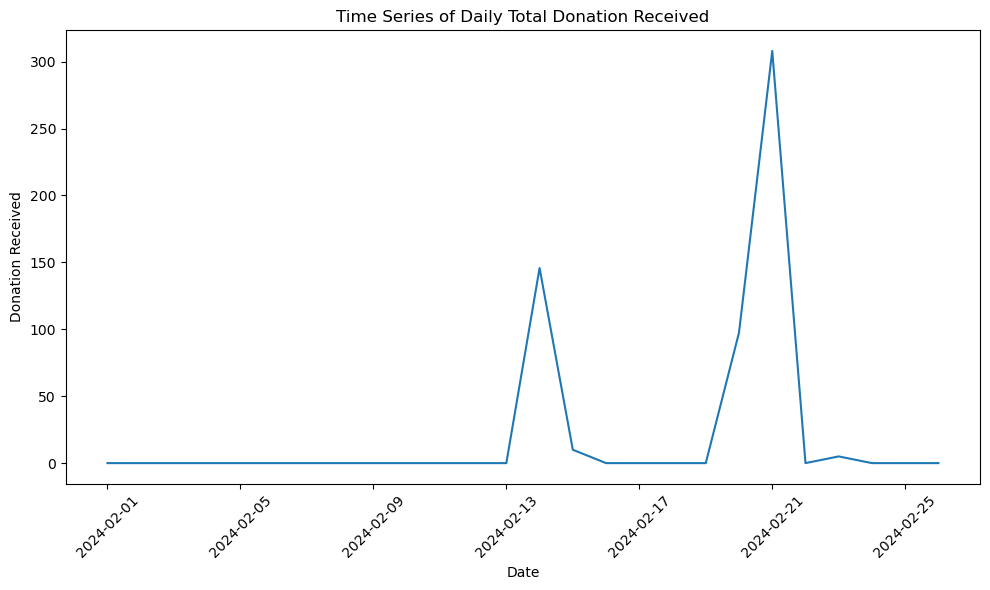

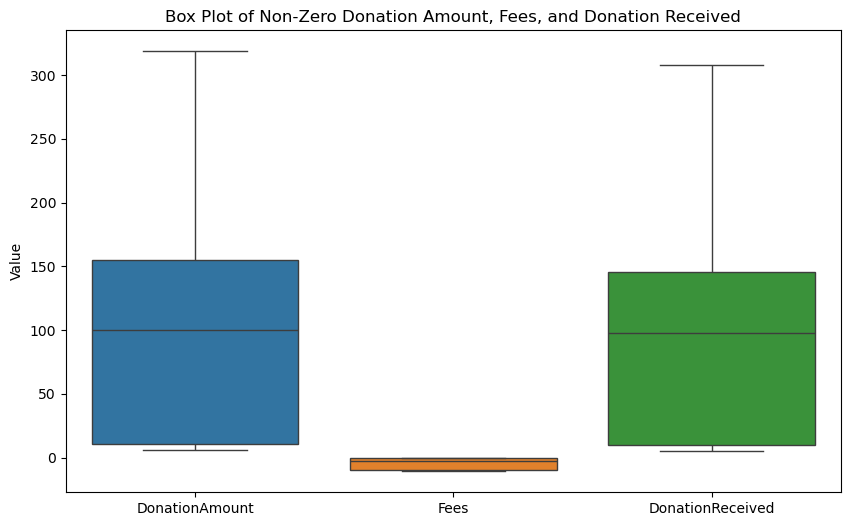

In [10]:
# Convert DateofDonation to datetime format for better handling
df['DateofDonation'] = pd.to_datetime(df['DateofDonation'])

# Plotting

#Histogram of Donation Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['DonationAmount'], bins=30, kde=True)
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.show()

#Time Series Plot of Daily Total Donation Received
plt.figure(figsize=(10, 6))
plt.plot(df['DateofDonation'], df['DonationReceived'])
plt.title('Time Series of Daily Total Donation Received')
plt.xlabel('Date')
plt.ylabel('Donation Received')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()

# Convert DateofDonation to datetime format for better handling
df['DateofDonation'] = pd.to_datetime(df['DateofDonation'])

# Filter out rows where DonationAmount is zero
df_non_zero = df[df['DonationAmount'] > 0]

# Box Plot for Non-Zero Donation Amount, Fees, and Donation Received
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_non_zero[['DonationAmount', 'Fees', 'DonationReceived']])
plt.title('Box Plot of Non-Zero Donation Amount, Fees, and Donation Received')
plt.ylabel('Value')
plt.show()